In [31]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [32]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [10]:
df = pd.read_csv("starbucks.csv")
df.head(5)

,Unnamed: 0,item,calories,fat,carb,fiber,protein,type
0,1,8-Grain Roll,350,8.0,67,5,10,bakery
1,2,Apple Bran Muffin,350,9.0,64,7,6,bakery
2,3,Apple Fritter,420,20.0,59,0,5,bakery
3,4,Banana Nut Loaf,490,19.0,75,4,7,bakery
4,5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  77 non-null     int64  
 1   item        77 non-null     object 
 2   calories    77 non-null     int64  
 3   fat         77 non-null     float64
 4   carb        77 non-null     int64  
 5   fiber       77 non-null     int64  
 6   protein     77 non-null     int64  
 7   type        77 non-null     object 
dtypes: float64(1), int64(5), object(2)
memory usage: 4.9+ KB


In [4]:
df.describe()

,Unnamed: 0,calories,fat,carb,fiber,protein
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,338.831169,13.766234,44.870130,2.220779,9.480519
std,22.371857,105.368701,7.095488,16.551634,2.112764,8.079556
min,1.000000,80.000000,0.000000,16.000000,0.000000,0.000000
25%,20.000000,300.000000,9.000000,31.000000,0.000000,5.000000
50%,39.000000,350.000000,13.000000,45.000000,2.000000,7.000000
75%,58.000000,420.000000,18.000000,59.000000,4.000000,15.000000
max,77.000000,500.000000,28.000000,80.000000,7.000000,34.000000


In [11]:
df['type'].value_counts()

type
bakery           41
petite            9
bistro box        8
hot breakfast     8
sandwich          7
parfait           3
salad             1
Name: count, dtype: int64

In [12]:
conditions = [
    (df['type'] == 'bakery') | (df['type'] == 'sandwich') | (df['type'] == 'parfait'),
    (df['type'] == 'petite') | (df['type'] == 'bistro box') | (df['type'] == 'hot breakfast') | (df['type'] == 'salad')
]

choices = ['unhealthy', 'healthy']

df['type2'] = np.select(conditions, choices, default='unknown')

In [13]:
df.head(5)

,Unnamed: 0,item,calories,fat,carb,fiber,protein,type,type2
0,1,8-Grain Roll,350,8.0,67,5,10,bakery,unhealthy
1,2,Apple Bran Muffin,350,9.0,64,7,6,bakery,unhealthy
2,3,Apple Fritter,420,20.0,59,0,5,bakery,unhealthy
3,4,Banana Nut Loaf,490,19.0,75,4,7,bakery,unhealthy
4,5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery,unhealthy


In [14]:
df['type2'].value_counts()

type2
unhealthy    51
healthy      26
Name: count, dtype: int64

In [15]:
df1 = df[['calories','fat','carb','fiber','protein','type','type2']]
df1.head(5)

,calories,fat,carb,fiber,protein,type,type2
0,350,8.0,67,5,10,bakery,unhealthy
1,350,9.0,64,7,6,bakery,unhealthy
2,420,20.0,59,0,5,bakery,unhealthy
3,490,19.0,75,4,7,bakery,unhealthy
4,130,6.0,17,0,0,bakery,unhealthy


In [16]:
la = LabelEncoder()
df1['type'] = la.fit_transform(df1['type'])
df1['type2']= la.fit_transform(df1['type2'])

df1.head(5)

/var/folders/8f/xt_fjqzx5n19d61dsmb06v400000gn/T/ipykernel_1396/3960977447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['type'] = la.fit_transform(df1['type'])
/var/folders/8f/xt_fjqzx5n19d61dsmb06v400000gn/T/ipykernel_1396/3960977447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['type2']= la.fit_transform(df1['type2'])


,calories,fat,carb,fiber,protein,type,type2
0,350,8.0,67,5,10,0,1
1,350,9.0,64,7,6,0,1
2,420,20.0,59,0,5,0,1
3,490,19.0,75,4,7,0,1
4,130,6.0,17,0,0,0,1


In [17]:
df1['type2'].value_counts()

type2
1    51
0    26
Name: count, dtype: int64

In [18]:
stand = StandardScaler()
df1[['calories','fat','carb','fiber','protein','type']] = stand.fit_transform(df1[['calories','fat','carb','fiber','protein','type']])

/var/folders/8f/xt_fjqzx5n19d61dsmb06v400000gn/T/ipykernel_1396/3709655844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['calories','fat','carb','fiber','protein','type']] = stand.fit_transform(df1[['calories','fat','carb','fiber','protein','type']])


In [19]:
df1.head(5)

,calories,fat,carb,fiber,protein,type,type2
0,0.106693,-0.817991,1.345788,1.324069,0.064717,-0.746912,1
1,0.106693,-0.676132,1.163348,2.276903,-0.433606,-0.746912,1
2,0.775383,0.884315,0.859282,-1.058018,-0.558187,-0.746912,1
3,1.444073,0.742456,1.832293,0.847652,-0.309025,-0.746912,1
4,-1.994905,-1.101709,-1.694871,-1.058018,-1.181091,-0.746912,1


In [20]:
x = df1.drop('type2',axis = 1 )
y = df1['type2']

In [21]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state= 42)

In [22]:
# 모델 생성
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'LogisticRegression': LogisticRegression(random_state=42)
}

# 모델 학습 및 평가
results = {'Model': [], 'Accuracy': []}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)

# 결과 출력
results_df = pd.DataFrame(results)
print(results_df)

                    Model  Accuracy
0           Decision Tree    0.8750
1           Random Forest    0.8750
2       Gradient Boosting    0.8750
3  Support Vector Machine    0.9375
4     K-Nearest Neighbors    0.8750
5             Naive Bayes    0.7500
6      LogisticRegression    0.6875


In [23]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

In [24]:
# 혼동 행렬 생성
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[ 5  1]
 [ 0 10]]


In [25]:
report = classification_report(y_test, y_pred)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.91      1.00      0.95        10

    accuracy                           0.94        16
   macro avg       0.95      0.92      0.93        16
weighted avg       0.94      0.94      0.94        16



In [26]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.2f}")

Accuracy: 0.94
Precision: 0.91
Recall: 1.00
F1-score: 0.95


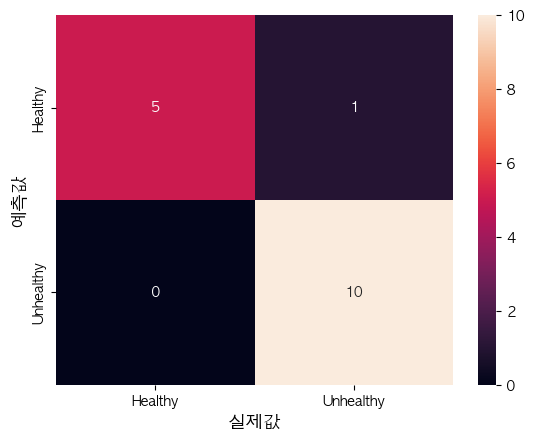

In [33]:
sns.heatmap(confusion,
            annot=True,
            fmt='g',
            xticklabels=['Healthy','Unhealthy'],
            yticklabels=['Healthy','Unhealthy'])
plt.ylabel('예측값',fontsize=13)
plt.xlabel('실제값',fontsize=13)
plt.show()

In [17]:
svc.fit(x,y)
pred = svc.predict(x)

In [18]:
svc.fit(x,y)
x['pred'] = svc.predict(x)

In [19]:
x.head(7)

,calories,fat,carb,fiber,protein,type,pred
0,0.106693,-0.817991,1.345788,1.324069,0.064717,-0.746912,1
1,0.106693,-0.676132,1.163348,2.276903,-0.433606,-0.746912,1
2,0.775383,0.884315,0.859282,-1.058018,-0.558187,-0.746912,1
3,1.444073,0.742456,1.832293,0.847652,-0.309025,-0.746912,1
4,-1.994905,-1.101709,-1.694871,-1.058018,-1.181091,-0.746912,1
5,0.297747,0.033162,0.129524,1.324069,-0.433606,-0.746912,1
6,1.157492,1.168032,0.980909,-0.105183,-0.309025,-0.746912,1


In [19]:
x['pred'] = x['pred'].replace({1: 'unhealthy',0: 'healthy'})
x.head(5)

,calories,fat,carb,fiber,protein,type,pred
0,0.106693,-0.817991,1.345788,1.324069,0.064717,-0.746912,unhealthy
1,0.106693,-0.676132,1.163348,2.276903,-0.433606,-0.746912,unhealthy
2,0.775383,0.884315,0.859282,-1.058018,-0.558187,-0.746912,unhealthy
3,1.444073,0.742456,1.832293,0.847652,-0.309025,-0.746912,unhealthy
4,-1.994905,-1.101709,-1.694871,-1.058018,-1.181091,-0.746912,unhealthy


In [20]:
df['pred1'] = x['pred']
df.head(5)

,Unnamed: 0,item,calories,fat,carb,fiber,protein,type,type2,pred1
0,1,8-Grain Roll,350,8.0,67,5,10,bakery,unhealthy,unhealthy
1,2,Apple Bran Muffin,350,9.0,64,7,6,bakery,unhealthy,unhealthy
2,3,Apple Fritter,420,20.0,59,0,5,bakery,unhealthy,unhealthy
3,4,Banana Nut Loaf,490,19.0,75,4,7,bakery,unhealthy,unhealthy
4,5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery,unhealthy,unhealthy


In [21]:
unhealthy = df[df['pred1'] == "unhealthy"]
healthy = df[df['pred1'] == "healthy"]

In [22]:
unhealthy['item'].value_counts()

item
8-Grain Roll                                     1
Reduced-Fat Very Berry Coffee Cake               1
Old-Fashioned Glazed Doughnut                    1
Outrageous Oatmeal Cookie                        1
Petite Vanilla Bean Scone                        1
Plain Bagel                                      1
Pumpkin Bread                                    1
Pumpkin Scone                                    1
Raspberry Scone                                  1
Raspberry Swirl Pound Cake                       1
Reduced-Fat Banana Chocolate Chip Coffee Cake    1
Reduced-Fat Cinnamon Swirl Coffee Cake           1
Starbucks Classic Coffee Cake                    1
Morning Bun                                      1
Zucchini Walnut Muffin                           1
Chicken Santa Fe Panini                          1
Egg Salad Sandwich                               1
Ham & Swiss Panini                               1
Roasted Tomato & Mozzarella Panini               1
Roasted Vegetable Panini  

In [23]:
healthy['item'].value_counts()

item
Cheese & Fruit                                             1
Chicken & Hummus                                           1
Veggie & Monterey Jack Artisan Breakfast Sandwich          1
Turkey Bacon & White Cheddar Classic Breakfast Sandwich    1
Starbucks Perfect Oatmeal                                  1
Spinach & Feta Breakfast Wrap                              1
Sausage & Cheddar Classic Breakfast Sandwich               1
Ham & Cheddar Artisan Breakfast Sandwich                   1
Chicken Sausage Breakfast Wrap                             1
Bacon & Gouda Artisan Breakfast Sandwich                   1
Tiramisu Cake Pop                                          1
Red Velvet Whoopie Pie                                     1
Raspberry Truffle Cake Pop                                 1
Chocolate Hazelnut Tart                                    1
Chocolate Creme Whoopie Pie                                1
Cherry Pie                                                 1
Brown Sugar Walnut 